Links to Prof. Vargo's notebooks for reference

**NOTE: <= 5-star and all reviews topic models in revision history!!**

[Professors notebook](https://colab.research.google.com/drive/1uV5vS2rC-VPgKHg40EtSXslYcgznvQ8b?usp=sharing#scrollTo=3yFzPpd-Q-Se)

[notebook 3](https://colab.research.google.com/drive/1WkQNI-Ck5g4VI34Fhb5e6cwAOQqQe2cn?usp=sharing#scrollTo=D5aYge8JVUtw)


In [ ]:
# !pip install matplotlib

try:
  import pyLDAvis
except:
  !pip install pyLDAvis==2.1.2
  import pyLDAvis
try:
  import tmtoolkit
except:
  !pip install tmtoolkit
  import tmtoolkit
try:
    from lda import LDA
except:
    !pip install lda
    from lda import LDA

import nltk
import random
import numpy as np
from tmtoolkit.corpus import Corpus
import json

import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

import pickle
import scipy.sparse

random.seed(20210128)   # to make the sampling reproducible
np.set_printoptions(precision=5)

def get_time():
    from datetime import datetime, timedelta
    d = datetime.today() - timedelta(hours=7, minutes=0)
    return d.strftime('%H:%M:%S %p')

In [ ]:
#set directory to file location
working_directory = '/content/drive/MyDrive/APRD6343'

#import files
doc_labels = pickle.load(open('%s/doc_labels2star.p' % working_directory, 'rb')) #labels
dtm_sm = scipy.sparse.load_npz('%s/small_dtm2star.npz' % working_directory) #more processed dtm (more processed = less shit in it)
dtm_bg = scipy.sparse.load_npz('%s/big_dtm2star.npz' % working_directory) #less processed dtm
vocab_bg = pickle.load(open('%s/big_vocab2star.p' % working_directory, 'rb')) #less processed vocab (keys)
vocab_sm = pickle.load(open('%s/small_vocab2star.p' % working_directory, 'rb')) #more processed vocab (keys)
corpus = pickle.load(open('%s/corpus2star.p' % working_directory, 'rb')) #corpus

In [ ]:
#suppress the "INFO" messages and warnings from lda
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

## Creating Models

In [ ]:
print("start time: '%s'" % get_time())

start time: '22:18:43 PM'


In [ ]:
#set data to use
dtms = {
    'smaller': dtm_sm
}

#and fixed hyperparameters
lda_params = {
    'n_topics': 15,
    'eta': .1,
    'alpha': 1/(10*17),
    'n_iter': 1000,
    'random_state': 20210128  #to make results reproducible
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

In [ ]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=3)

topic_1
> #1. pant (0.081555)
> #2. leg (0.080524)
> #3. fit (0.079493)
topic_2
> #1. coat (0.095853)
> #2. jacket (0.064233)
> #3. quality (0.060620)
topic_3
> #1. jacket (0.168614)
> #2. size (0.046188)
> #3. coat (0.043008)
topic_4
> #1. jacket (0.105444)
> #2. sleeve (0.066637)
> #3. size (0.065528)
topic_5
> #1. shirt (0.232374)
> #2. size (0.085663)
> #3. medium (0.041650)
topic_6
> #1. jean (0.216514)
> #2. size (0.071541)
> #3. pair (0.071541)
topic_7
> #1. sock (0.261171)
> #2. pair (0.084446)
> #3. boot (0.052314)
topic_8
> #1. wallet (0.160891)
> #2. pocket (0.117407)
> #3. money (0.072605)
topic_9
> #1. jean (0.093379)
> #2. pair (0.083558)
> #3. pocket (0.063098)
topic_10
> #1. sock (0.197698)
> #2. size (0.161923)
> #3. foot (0.076373)
topic_11
> #1. shirt (0.236538)
> #2. quality (0.049632)
> #3. product (0.033677)
topic_12
> #1. size (0.153406)
> #2. pair (0.097719)
> #3. pant (0.064917)
topic_13
> #1. boot (0.280070)
> #2. month (0.062837)
> #3. pair (0.055547)
topic_1

## Topic names and Classification

In [ ]:
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

doc_lengths_sm = doc_lengths(dtm_sm)
topic_labels = generate_topic_labels_from_top_words(
    #current model words
    model_sm.topic_word_,
    #model topics
    model_sm.doc_topic_,
    #length of model
    doc_lengths_sm,
    #vocab from model
    vocab_sm,
    lambda_=0.7
)

In [ ]:
topic_labels

array(['1_leg_fit_waist', '2_coat_jacket_quality', '3_jacket_coat_hood',
       '4_jacket_sweatshirt_sleeve', '5_shirt_size_medium',
       '6_jean_pair_denim', '7_sock_pair_toe', '8_wallet_pocket_money',
       '9_jean_pair_pocket', '10_sock_size_shoe',
       '11_shirt_quality_cotton', '12_size_pair_pant',
       '13_boot_month_foot', '14_pant_waist_leg',
       '15_return_color_shipping'], dtype='<U26')

### Classify documents

this code classifies documents and ranks them based on relevance

In [ ]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
doc_topic = model_sm.doc_topic_
documentclassifications = ldamodel_top_doc_topics(doc_topic, doc_labels, top_n=2, topic_labels=topic_labels) #can change top_n (shows number of topics for each document)

In [ ]:
documentclassifications.head()

,rank_1,rank_2
document,,
10003,2_coat_jacket_quality (0.9838),15_size_color_product (0.001156)
1003,11_shirt_quality_product (0.9606),15_size_color_product (0.002817)
10044,6_jean_pair_size (0.9243),15_size_color_product (0.005405)
10053,4_jacket_sleeve_sweatshirt (0.9909),15_size_color_product (0.0006472)
10077,3_jacket_coat_size (0.9865),15_size_color_product (0.0009662)


In [ ]:
#make blank text column in pandas
documentclassifications['text'] = np.nan
#iterate through pd df line by line and pull out index and data of a row
for index, arow in documentclassifications.iterrows():
  documentclassifications['text'][index] = corpus[index] #sets specific index of pandas

In [ ]:
documentclassifications.iloc[10]

rank_1                          3_jacket_coat_size (0.9838)
rank_2                     15_size_color_product (0.001156)
text      Snaps worked perfectly when hood first arrived...
Name: 10119, dtype: object

In [ ]:
documentclassifications.loc['10119']['text']

"Snaps worked perfectly when hood first arrived i then removed hood as it wasn't needed. Then when i needed hood I went to snap on to jacket and snaps would not stay on. Had to return item."

In [ ]:
documentclassifications.head()

,rank_1,rank_2,text
document,,,
10003,2_coat_jacket_quality (0.9838),15_size_color_product (0.001156),"I'm frustrated this was delivered ""from Amazon..."
1003,11_shirt_quality_product (0.9606),15_size_color_product (0.002817),a pull thread on the logo patch pull and the p...
10044,6_jean_pair_size (0.9243),15_size_color_product (0.005405),We did not receive flannel liner like ad claim...
10053,4_jacket_sleeve_sweatshirt (0.9909),15_size_color_product (0.0006472),It runs big. I got an XL and it says 16/18 on ...
10077,3_jacket_coat_size (0.9865),15_size_color_product (0.0009662),Wow! I was very disappointed in the fit and cu...


In [ ]:
#shows the number of documents that relate to 'warm'
print('Results:')
lookup_pants = documentclassifications[documentclassifications['text'].str.contains('pants')] #str.contains looks for all results with specific word in it
lookup_pants.head()

Results:


,rank_1,rank_2,text
document,,,
10997,14_pant_waist_size (0.7936),2_coat_jacket_quality (0.1988),I purchased both the jacket and pants at a pre...
11056,1_leg_fit_pant (0.9243),15_size_color_product (0.005405),These pants wear out very quickly. I will not ...
11060,14_pant_waist_size (0.7861),1_leg_fit_pant (0.2099),"Guess I read something wrong, and all the 5 st..."
11079,14_pant_waist_size (0.9884),15_size_color_product (0.0008299),Pant-legs were wide enough to pull on over my ...
11086,14_pant_waist_size (0.9884),15_size_color_product (0.0008299),Out of two pair of pants one fits ok and the o...


In [ ]:
#shows the number of documents that relate to a specific thing
print('Results:')
lookup_shirt = documentclassifications[documentclassifications['text'].str.contains('shirt')] #str.contains looks for all results with specific word in it
lookup_shirt.head()

Results:


,rank_1,rank_2,text
document,,,
1003,11_shirt_quality_product (0.9606),15_size_color_product (0.002817),a pull thread on the logo patch pull and the p...
1008,11_shirt_quality_product (0.7936),2_coat_jacket_quality (0.1988),"I have been wearing this shirt for 10 years, t..."
10341,5_shirt_size_medium (0.4626),2_coat_jacket_quality (0.3895),I had high expectations for this thermal shirt...
1036,5_shirt_size_medium (0.9838),15_size_color_product (0.001156),"I Like these t shirts, BUT you never know what..."
1060,11_shirt_quality_product (0.9909),15_size_color_product (0.0006472),"Like all Carhartt wear, this is good quality. ..."


In [ ]:
#shows the number of documents that relate to a specific thing
print('Results:')
lookup_coat = documentclassifications[documentclassifications['text'].str.contains('coat')] #str.contains looks for all results with specific word in it
lookup_coat.head()

Results:


,rank_1,rank_2,text
document,,,
10003,2_coat_jacket_quality (0.9838),15_size_color_product (0.001156),"I'm frustrated this was delivered ""from Amazon..."
10094,3_jacket_coat_size (0.6964),15_size_color_product (0.3018),I bought this as a christmas gift for my wife....
10112,3_jacket_coat_size (0.9838),15_size_color_product (0.001156),"This hood, supposedly made for the Sandstone c..."
10120,3_jacket_coat_size (0.9884),15_size_color_product (0.0008299),The Carhartt Brown is WAAAAAY darker than the ...
10124,15_size_color_product (0.9606),14_pant_waist_size (0.002817),"it will work, but Sandstone looks like the lig..."


In [ ]:
print('Results:')
lookup_jacket = documentclassifications[documentclassifications['text'].str.contains('jacket')]
lookup_jacket.head()

Results:


,rank_1,rank_2,text
document,,,
10053,4_jacket_sleeve_sweatshirt (0.9909),15_size_color_product (0.0006472),It runs big. I got an XL and it says 16/18 on ...
10077,3_jacket_coat_size (0.9865),15_size_color_product (0.0009662),Wow! I was very disappointed in the fit and cu...
10094,3_jacket_coat_size (0.6964),15_size_color_product (0.3018),I bought this as a christmas gift for my wife....
10119,3_jacket_coat_size (0.9838),15_size_color_product (0.001156),Snaps worked perfectly when hood first arrived...
10121,3_jacket_coat_size (0.9799),15_size_color_product (0.001439),"It's well made, but the Carhartt Brown hood do..."


In [ ]:
print('Results:')
lookup_return = documentclassifications[documentclassifications['text'].str.contains('return')]
lookup_return.head()

Results:


,rank_1,rank_2,text
document,,,
10053,4_jacket_sleeve_sweatshirt (0.9909),15_size_color_product (0.0006472),It runs big. I got an XL and it says 16/18 on ...
10094,3_jacket_coat_size (0.6964),15_size_color_product (0.3018),I bought this as a christmas gift for my wife....
10119,3_jacket_coat_size (0.9838),15_size_color_product (0.001156),Snaps worked perfectly when hood first arrived...
10120,3_jacket_coat_size (0.9884),15_size_color_product (0.0008299),The Carhartt Brown is WAAAAAY darker than the ...
10124,15_size_color_product (0.9606),14_pant_waist_size (0.002817),"it will work, but Sandstone looks like the lig..."


In [ ]:
print("""Number of docs with pants:
%s""" % lookup_pants.count()[1])
print()
print("""Number of docs with shirt:
%s""" % lookup_shirt.count()[1])
print()
print("""Number of docs with coat:
%s""" % lookup_coat.count()[1])
print()
print("""Number of docs with jacket:
%s""" % lookup_jacket.count()[1])
print()
print("""Number of docs with return:
%s""" % lookup_return.count()[1])

Number of docs with pants:
243

Number of docs with shirt:
383

Number of docs with coat:
84

Number of docs with jacket:
169

Number of docs with return:
393


In [ ]:
#to export this to excel - NOT REQUIRED
documentclassifications.to_excel('%s/topics.documentclassification2star.xlsx' % working_directory)

In [ ]:
#use lda visualization tool from tmtoolkit to visualize the topic model
from tmtoolkit.topicmod.visualize import parameters_for_ldavis

ldavis_params = parameters_for_ldavis(model_sm.topic_word_,
                                      model_sm.doc_topic_,
                                      dtm_sm,
                                      vocab_sm)

In [ ]:
#some code to get the visualization working
%matplotlib inline
vis = pyLDAvis.prepare(**ldavis_params)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis)

In [ ]:
from tmtoolkit.topicmod.visualize import generate_wordclouds_for_topic_words

# some options for wordcloud output
img_w = 400   # image width
img_h = 300   # image height

topic_clouds = generate_wordclouds_for_topic_words(
    model_sm.topic_word_, vocab_sm,
    top_n=20, topic_labels=topic_labels,
    width=img_w, height=img_h
)

# show all generated word clouds
topic_clouds.keys()

dict_keys(['1_leg_fit_waist', '2_coat_jacket_quality', '3_jacket_coat_hood', '4_jacket_sweatshirt_sleeve', '5_shirt_size_medium', '6_jean_pair_denim', '7_sock_pair_toe', '8_wallet_pocket_money', '9_jean_pair_pocket', '10_sock_size_shoe', '11_shirt_quality_cotton', '12_size_pair_pant', '13_boot_month_foot', '14_pant_waist_leg', '15_return_color_shipping'])

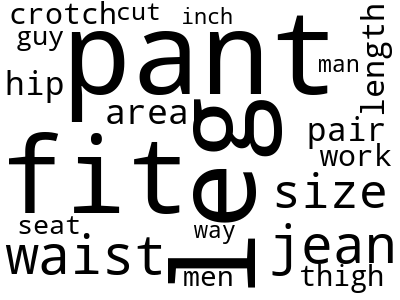

In [ ]:
topic_clouds['1_leg_fit_waist']

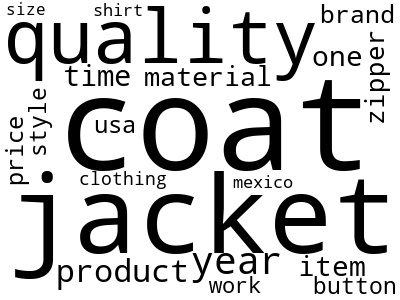

In [ ]:
topic_clouds['2_coat_jacket_quality']

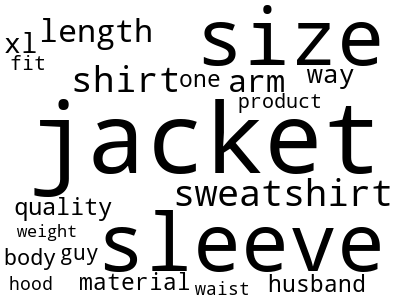

In [ ]:
topic_clouds['4_jacket_sweatshirt_sleeve']

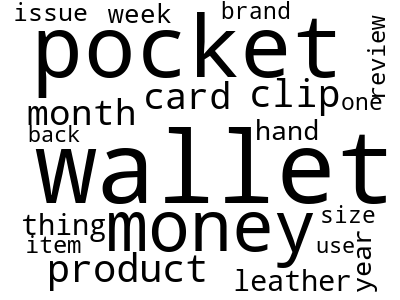

In [ ]:
topic_clouds['8_wallet_pocket_money']

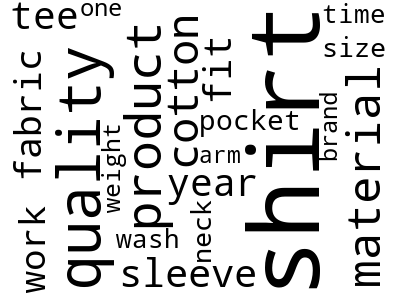

In [ ]:
topic_clouds['11_shirt_quality_cotton']

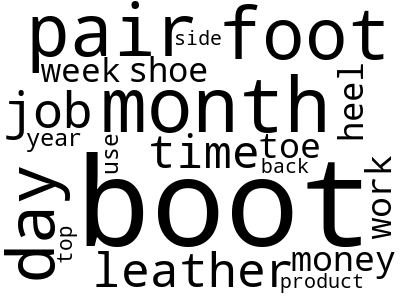

In [ ]:
topic_clouds['13_boot_month_foot']

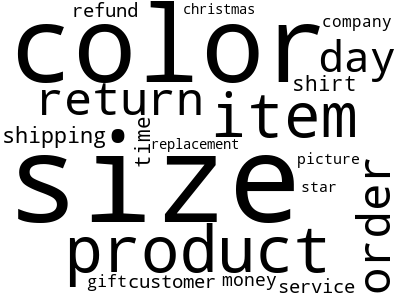

In [ ]:
topic_clouds['15_return_color_shipping']